In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_dataframe = pd.read_csv(r'C:\Users\user\Documents\machine-learning\week 1\latihan week 1\Week1_Daftar_Saham.csv')

In [3]:
dataset_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB


In [4]:
# dataset_dataframe.isnull() untuk mendeteksi nilai 'null' pada dataframe

dataset_dataframe.isnull().sum()

Code                   0
Name                   0
ListingDate            0
Shares                 0
ListingBoard           0
Sector                 0
LastPrice              5
MarketCap              5
MinutesFirstAdded     42
MinutesLastUpdated    42
HourlyFirstAdded      23
HourlyLastUpdated     23
DailyFirstAdded        5
DailyLastUpdated       5
dtype: int64

In [5]:
# dalam bentuk persen
dataset_dataframe.isnull().sum() / len(dataset_dataframe) * 100

Code                  0.000000
Name                  0.000000
ListingDate           0.000000
Shares                0.000000
ListingBoard          0.000000
Sector                0.000000
LastPrice             0.603136
MarketCap             0.603136
MinutesFirstAdded     5.066345
MinutesLastUpdated    5.066345
HourlyFirstAdded      2.774427
HourlyLastUpdated     2.774427
DailyFirstAdded       0.603136
DailyLastUpdated      0.603136
dtype: float64

### Identifikasi nilai yang hilang/missing value dan penanganannya

In [6]:
dataset_dataframe['LastPrice'] = dataset_dataframe['LastPrice'].fillna(dataset_dataframe['LastPrice'].mean())

In [7]:
dataset_dataframe['MarketCap'] = dataset_dataframe['MarketCap'].fillna(dataset_dataframe['MarketCap'].mean())

In [8]:
# cara handle missing value tipedata datetime
dataset_dataframe['MinutesFirstAdded'] = dataset_dataframe['MinutesFirstAdded'].ffill() # ffill berfungsi untuk mengisi nilai null menggunakan nilai sebelumnya
dataset_dataframe['MinutesLastUpdated'] = dataset_dataframe['MinutesLastUpdated'].bfill() # bfill berfungsi mengisi nilai null dengan nilai sesudahnya

In [9]:
dataset_dataframe['HourlyFirstAdded'] = dataset_dataframe['HourlyFirstAdded'].ffill()
dataset_dataframe['HourlyLastUpdated'] = dataset_dataframe['HourlyLastUpdated'].bfill()

In [10]:
dataset_dataframe['DailyFirstAdded'] =dataset_dataframe['DailyFirstAdded'].ffill()
dataset_dataframe['DailyLastUpdated'] =dataset_dataframe['DailyLastUpdated'].bfill()

### Identifikasi nilai yang terduplikasi/duplicate value dan penanganannya

In [ ]:
# mendeteksi jumlah data yang terduplikat
dataset_dataframe.duplicated().sum()
# value duplicated data is zero

np.int64(0)

### Analisis distribusi kategorikal atau numerical


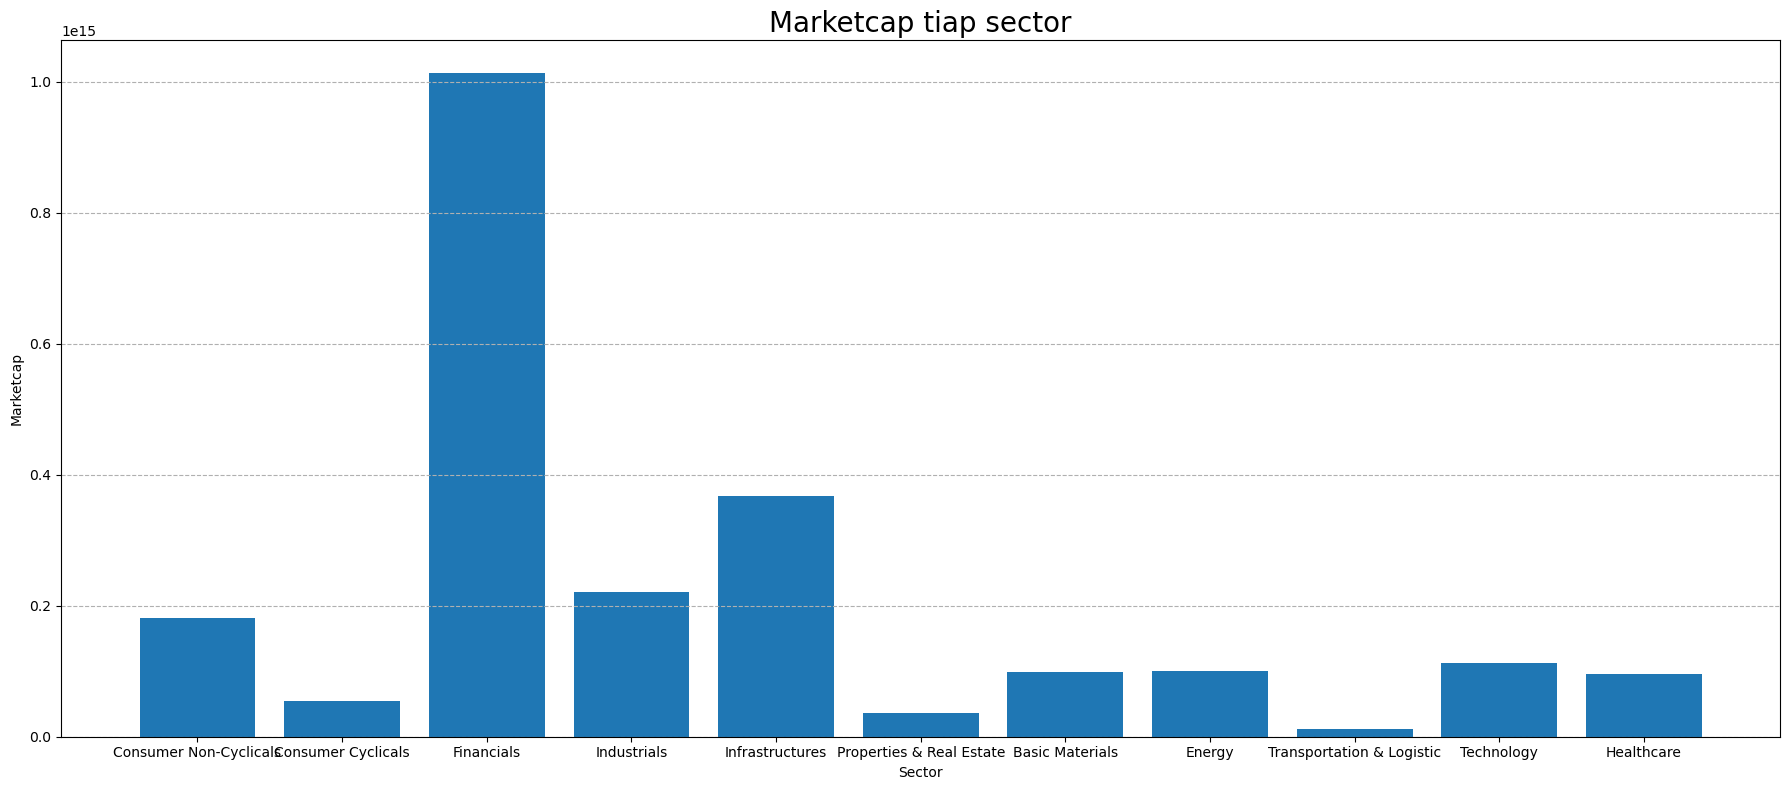

In [13]:
marketcap= dataset_dataframe['MarketCap']
sector = dataset_dataframe['Sector']
plt.figure(figsize=(18, 8))
plt.bar(sector, marketcap)

plt.title("Marketcap tiap sector", fontsize=20)
plt.xlabel("Sector")
plt.ylabel("Marketcap")

plt.grid(axis='y', alpha=1, linestyle= '--')
plt.tight_layout()
plt.show()

In [14]:
dataset_dataframe.columns

Index(['Code', 'Name', 'ListingDate', 'Shares', 'ListingBoard', 'Sector',
       'LastPrice', 'MarketCap', 'MinutesFirstAdded', 'MinutesLastUpdated',
       'HourlyFirstAdded', 'HourlyLastUpdated', 'DailyFirstAdded',
       'DailyLastUpdated'],
      dtype='object')

#### before remove outliar ('lastprice')

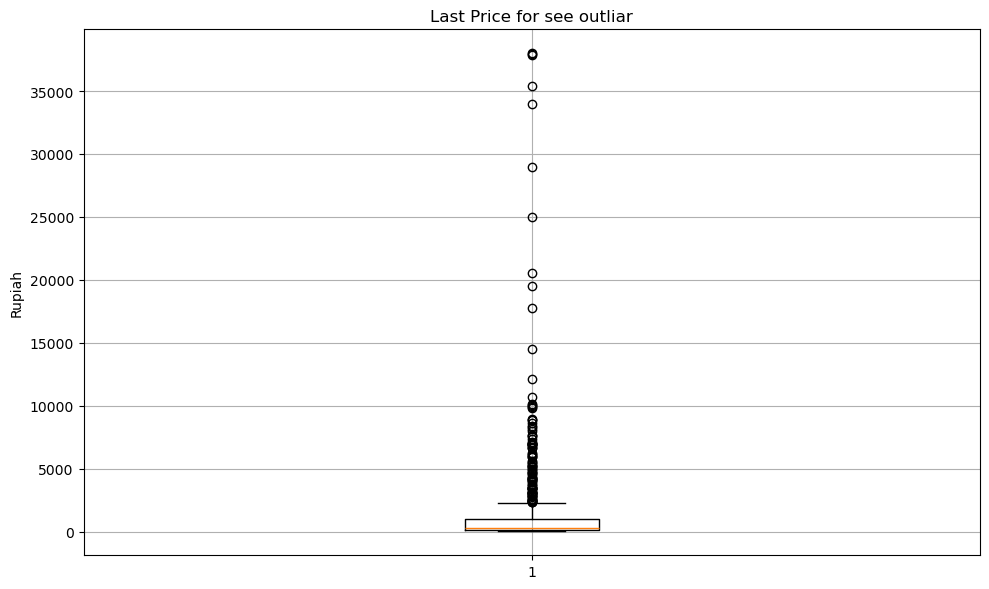

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_dataframe['LastPrice'])
plt.title("Last Price for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()
# titik hitam itu adalah outliar

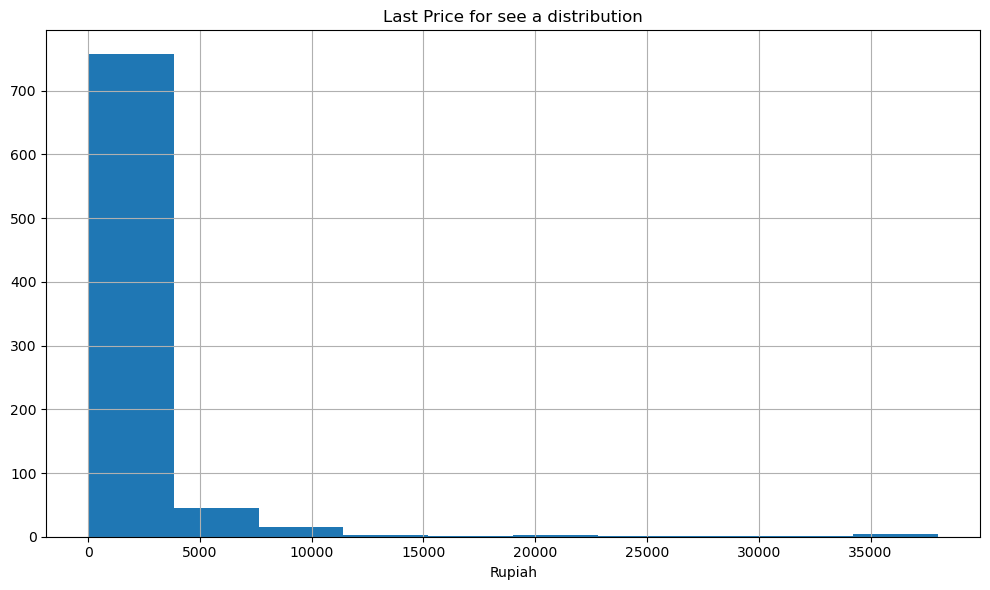

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(dataset_dataframe['LastPrice'])
plt.title("Last Price for see a distribution")
plt.xlabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

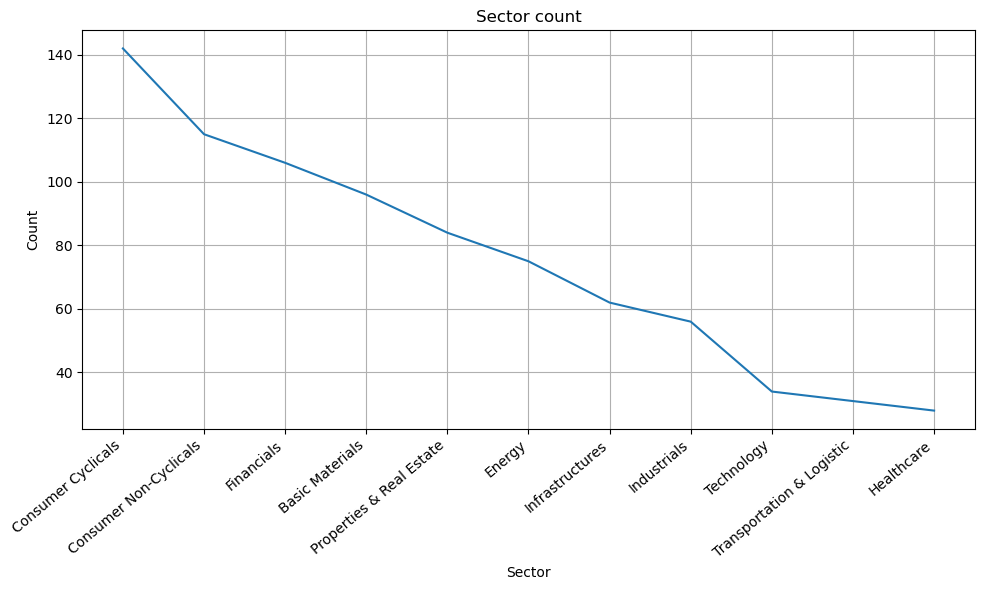

In [17]:
sector_counts = dataset_dataframe['Sector'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(sector_counts)
plt.title("Sector count")
plt.xlabel("Sector")
plt.xticks(rotation=40, ha='right')
plt.ylabel("Count")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

### Gunakan groupby() untuk agregasi

In [18]:
dataset_dataframe.sample(2)

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
316,HATM,Habco Trans Maritima Tbk.,2022-07-26,7.000000e+09,Pengembangan,Transportation & Logistic,320.0,2.240000e+12,2022-07-26 09:00:00,2023-01-06 15:59:00,2022-07-26 09:00:00,2023-01-06 15:00:00,2022-07-26,2023-01-06
188,CITA,Cita Mineral Investindo Tbk.,2002-03-20,3.960361e+09,Pengembangan,Basic Materials,3460.0,1.370285e+13,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2002-03-20,2023-01-06


In [19]:
# .std() -> mencari standar deviasi
dataset_dataframe.groupby('ListingBoard')['MarketCap'].agg(['std', 'mean', 'median', 'max', 'min'])

,std,mean,median,max,min
ListingBoard,,,,,
Akselerasi,2.162846e+11,1.817618e+11,1.014691e+11,7.893900e+11,2.500017e+10
Pengembangan,9.545943e+12,3.106069e+12,5.545716e+11,9.826181e+13,9.000000e+09
Utama,7.278657e+13,1.847255e+13,2.808012e+12,1.012951e+15,5.058874e+10


### Bersihkan outliernya

function remove_outliar() berfungsi untuk menghapus data outliar berdasarkan q1 dan q3 

In [ ]:
def remove_outliar(df, colom, x):
    df_clean = df.copy()
    for col in colom:
        q1 = df_clean[col].quantile(0.25)# 0.25 = 25% # .quantile(param) berfungsi untuk menghitung nilai kuartil data
        q3 = df_clean[col].quantile(0.75)# 0.75 = 75%
        iqr = q3 - q1
        lower_bound = q1 - x * iqr
        upper_bound = q3 + x * iqr
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col]<= upper_bound)]
    return df_clean 

In [ ]:
# numerik_colm berisikan colom2 yang bertipekan float64 (64-bit)
numerik_colm = dataset_dataframe.select_dtypes('float64').columns.to_list()
dataset_no_outliar =remove_outliar(dataset_dataframe, numerik_colm, 1.5)


In [22]:
dataset_no_outliar.dtypes

Code                   object
Name                   object
ListingDate            object
Shares                float64
ListingBoard           object
Sector                 object
LastPrice             float64
MarketCap             float64
MinutesFirstAdded      object
MinutesLastUpdated     object
HourlyFirstAdded       object
HourlyLastUpdated      object
DailyFirstAdded        object
DailyLastUpdated       object
dtype: object

#### before remove outliars ('Shares')

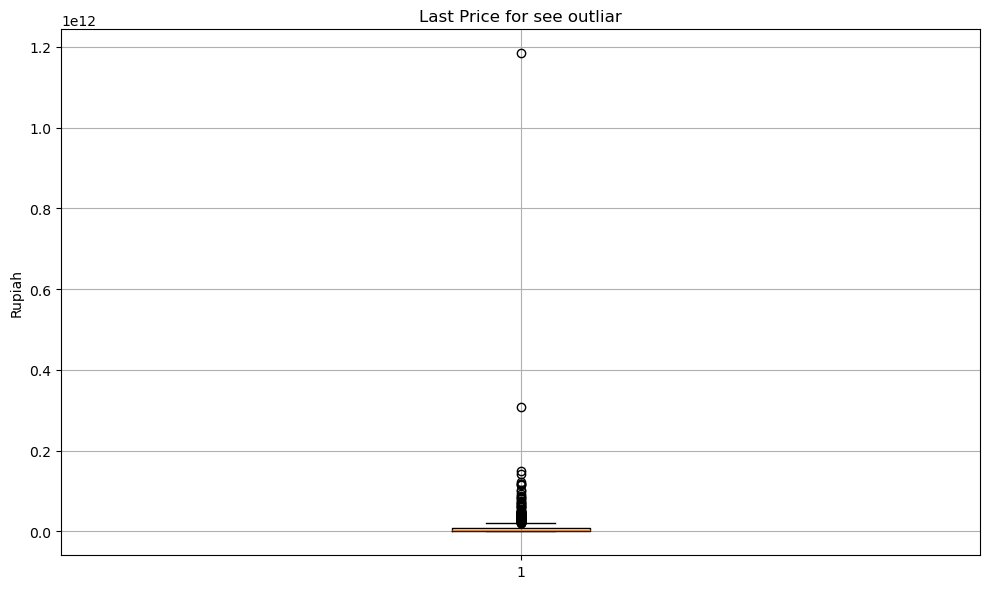

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_dataframe['Shares'])
plt.title("Last Price for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

#### after remove outliars ('Shares')

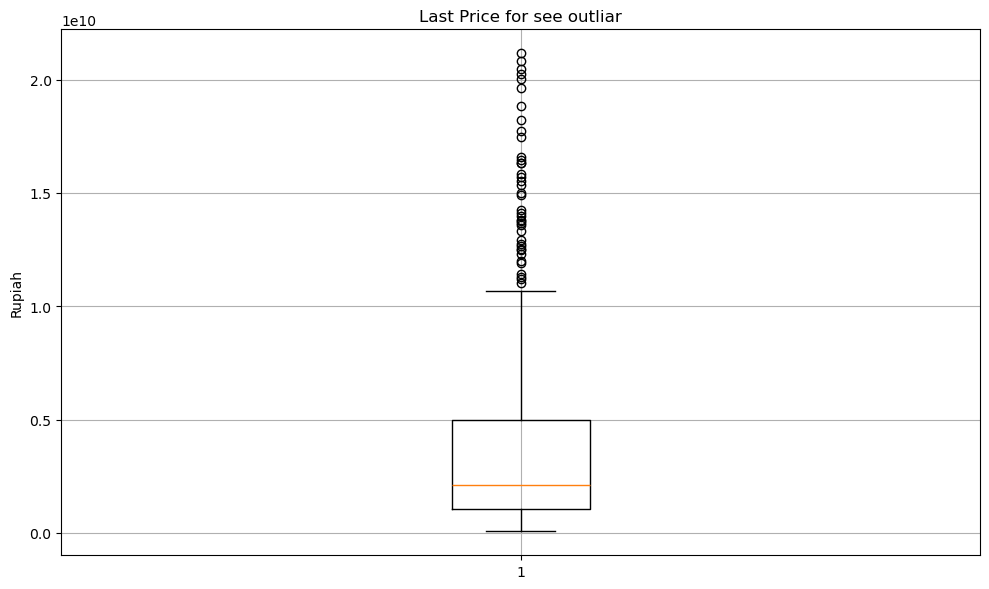

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_no_outliar['Shares'])
plt.title("Last Price for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

#### after remove outliars ('lastprice')

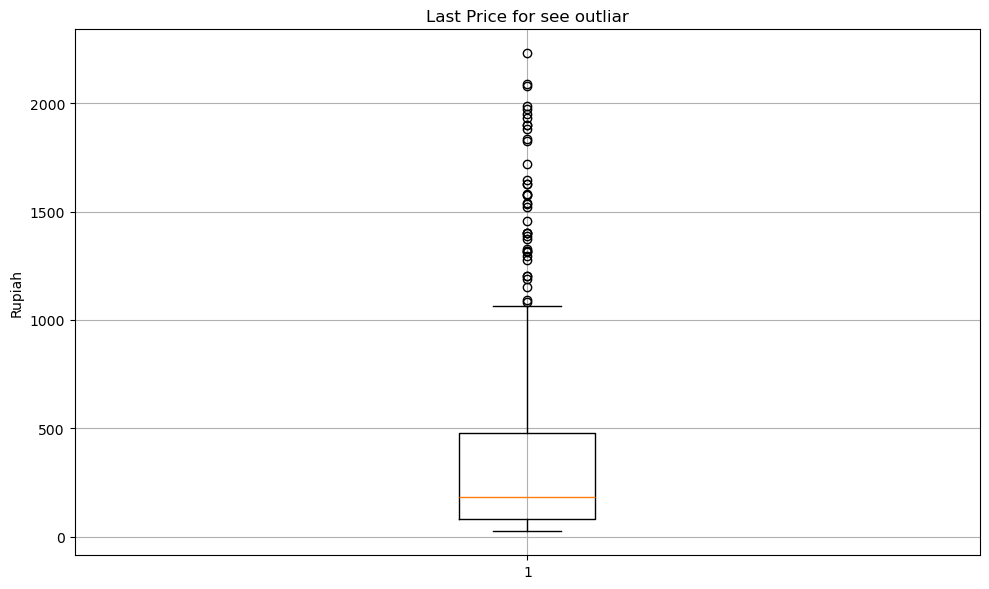

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_no_outliar['LastPrice'])
plt.title("Last Price for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

#### before remove outliars ('MarketCap')

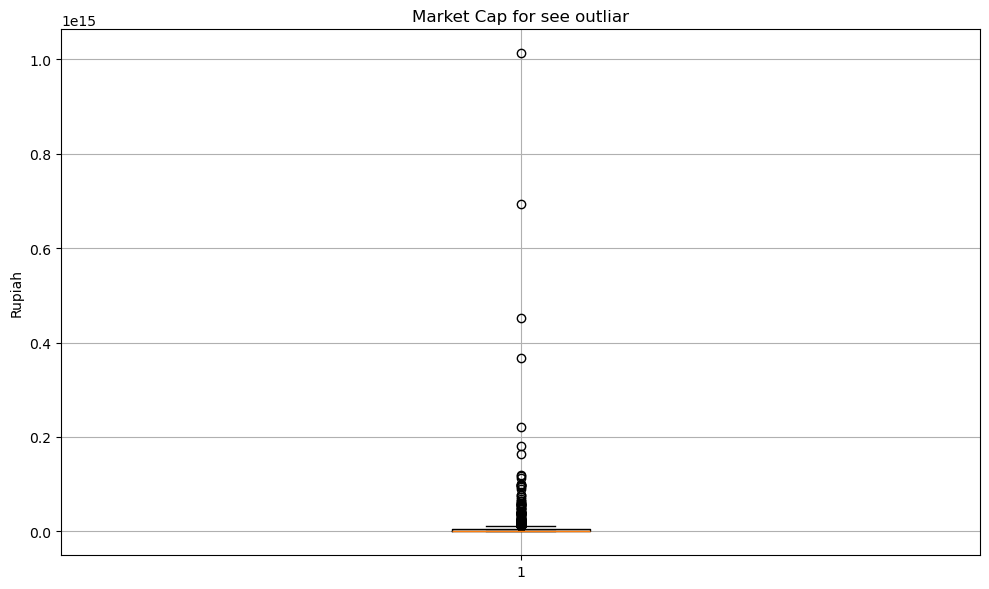

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_dataframe['MarketCap'])
plt.title("Market Cap for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

### after remove outliars ('MarketCap')

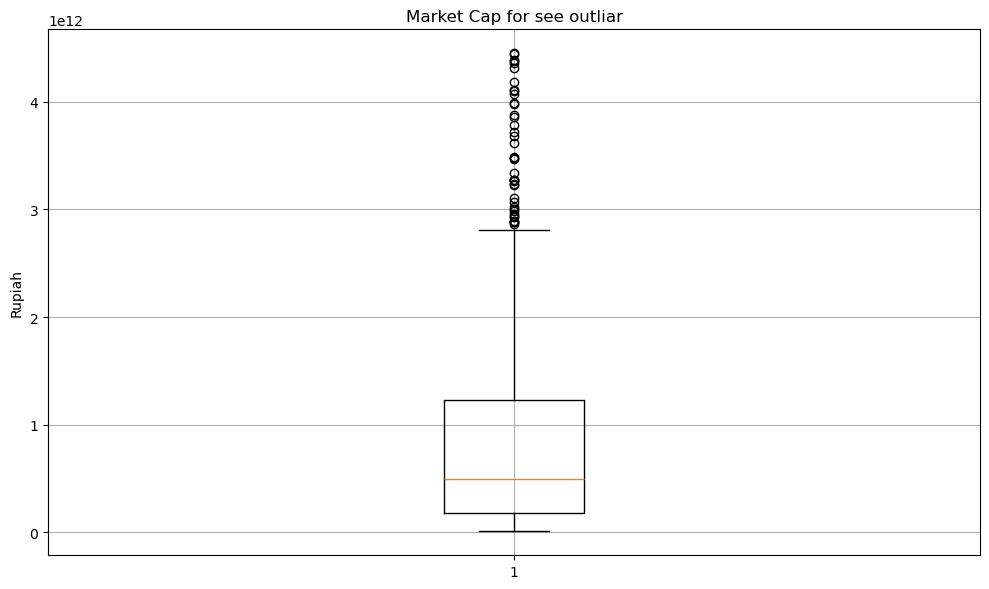

In [27]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset_no_outliar['MarketCap'])
plt.title("Market Cap for see outliar")
plt.ylabel("Rupiah")
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

### Hitung matriks korelasi

In [54]:
dataset_no_outliar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 1 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Code                563 non-null    object        
 1   Name                563 non-null    object        
 2   ListingDate         563 non-null    object        
 3   Shares              563 non-null    float64       
 4   ListingBoard        563 non-null    object        
 5   Sector              563 non-null    object        
 6   LastPrice           563 non-null    float64       
 7   MarketCap           563 non-null    float64       
 8   MinutesFirstAdded   563 non-null    datetime64[ns]
 9   MinutesLastUpdated  563 non-null    datetime64[ns]
 10  HourlyFirstAdded    563 non-null    datetime64[ns]
 11  HourlyLastUpdated   563 non-null    datetime64[ns]
 12  DailyFirstAdded     563 non-null    datetime64[ns]
 13  DailyLastUpdated    563 non-null    datetime64[ns]
dtyp

In [57]:
colm_numeric = dataset_no_outliar[['LastPrice', 'Shares', 'MarketCap']]
corr_matrix = colm_numeric.corr()

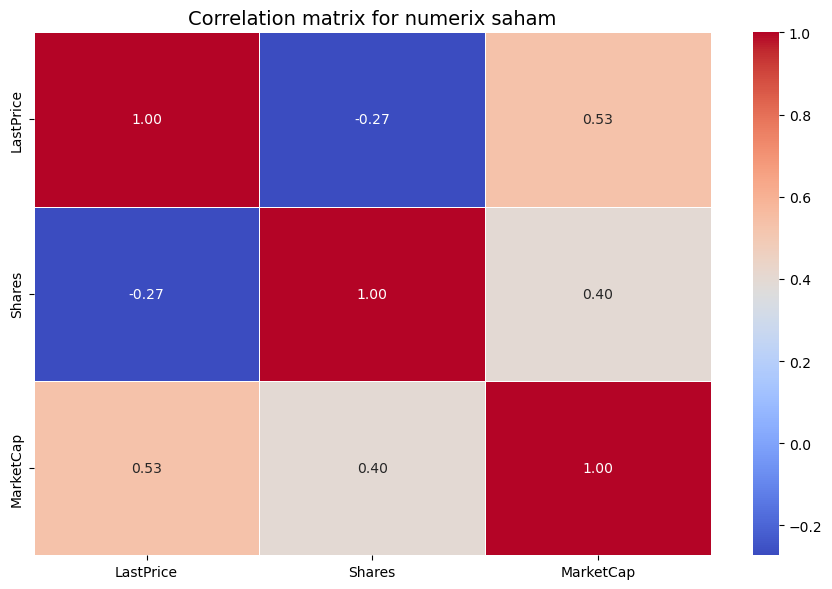

In [70]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix for numerix saham", fontsize=14)
plt.tight_layout()
plt.show()

Hasil dari korelasi matrix ini adalah MarketCap memiliki korelasi yang tinggi/kuat dengan Shares dan LastPrice. Dalam hal ini semakin besar market cap maka akan semakin besar jumlah saham yang beredar dan semakin tinggi harga per saham.

In [30]:
dataset_no_outliar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 1 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                563 non-null    object 
 1   Name                563 non-null    object 
 2   ListingDate         563 non-null    object 
 3   Shares              563 non-null    float64
 4   ListingBoard        563 non-null    object 
 5   Sector              563 non-null    object 
 6   LastPrice           563 non-null    float64
 7   MarketCap           563 non-null    float64
 8   MinutesFirstAdded   563 non-null    object 
 9   MinutesLastUpdated  563 non-null    object 
 10  HourlyFirstAdded    563 non-null    object 
 11  HourlyLastUpdated   563 non-null    object 
 12  DailyFirstAdded     563 non-null    object 
 13  DailyLastUpdated    563 non-null    object 
dtypes: float64(3), object(11)
memory usage: 66.0+ KB


In [36]:
# mengubah tipe object ke datetime. Because jika tidak diganti itu akan mempengaruhi model dan akan terjadi gagal membaca atau error
dataset_no_outliar['MinutesFirstAdded'] = pd.to_datetime(dataset_no_outliar['MinutesFirstAdded'])
dataset_no_outliar['MinutesLastUpdated'] = pd.to_datetime(dataset_no_outliar['MinutesLastUpdated'])
dataset_no_outliar['HourlyFirstAdded'] = pd.to_datetime(dataset_no_outliar['HourlyFirstAdded'])
dataset_no_outliar['HourlyLastUpdated'] = pd.to_datetime(dataset_no_outliar['HourlyLastUpdated'])
dataset_no_outliar['DailyFirstAdded'] =pd.to_datetime(dataset_no_outliar['DailyFirstAdded'])
dataset_no_outliar['DailyLastUpdated'] = pd.to_datetime(dataset_no_outliar['DailyLastUpdated'])

In [35]:
dataset_no_outliar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 1 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Code                563 non-null    object        
 1   Name                563 non-null    object        
 2   ListingDate         563 non-null    object        
 3   Shares              563 non-null    float64       
 4   ListingBoard        563 non-null    object        
 5   Sector              563 non-null    object        
 6   LastPrice           563 non-null    float64       
 7   MarketCap           563 non-null    float64       
 8   MinutesFirstAdded   563 non-null    datetime64[ns]
 9   MinutesLastUpdated  563 non-null    datetime64[ns]
 10  HourlyFirstAdded    563 non-null    datetime64[ns]
 11  HourlyLastUpdated   563 non-null    datetime64[ns]
 12  DailyFirstAdded     563 non-null    datetime64[ns]
 13  DailyLastUpdated    563 non-null    datetime64[ns]
dtyp